In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Cardiotocographic.csv')

In [3]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [18]:
# Data Cleaning and Preparation
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [19]:
df_clean=df.dropna()

In [20]:
df_clean=df_clean.apply(pd.to_numeric,errors='coerce')

In [23]:
# Detect outliers using IQR
Q1=df_clean.quantile(0.25)
Q3=df_clean.quantile(0.75)
IQR=Q3-Q1
outliers=((df_clean<(Q1-1.5*IQR)) | (df_clean>(Q3+1.5*IQR))).sum()
print("Outliers per Column:\n",outliers)

Outliers per Column:
 LB           10
AC           39
FM          343
UC           13
DL          124
DS          120
DP          284
ASTV         10
MSTV         78
ALTV        317
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64


In [26]:
# Statistical Summary
df_clean.describe().T
print("\nStatistical Summary:\n",desc)


Statistical Summary:
            count        mean        std         min         25%         50%  \
LB        2105.0  133.343598  11.270154   51.842487  126.000000  133.000000   
AC        2105.0    0.003202   0.004324   -0.019284    0.000000    0.001631   
FM        2105.0    0.009963   0.067870   -0.480634    0.000000    0.000000   
UC        2105.0    0.004388   0.003350   -0.014925    0.001838    0.004484   
DL        2105.0    0.001892   0.003348   -0.015393    0.000000    0.000000   
DS        2105.0    0.000003   0.000142   -0.001353    0.000000    0.000000   
DP        2105.0    0.000175   0.000840   -0.005348    0.000000    0.000000   
ASTV      2105.0   46.996929  18.847737  -63.000000   32.000000   49.000000   
MSTV      2105.0    1.361006   1.173164   -6.600000    0.700000    1.200000   
ALTV      2105.0   10.353647  21.282102  -91.000000    0.000000    0.000000   
MLTV      2105.0    8.284887   7.772858  -50.700000    4.600000    7.400000   
Width     2105.0   70.429260 

In [27]:
# Highlight insights
print("Insights from Summary:")
print("Mean baseline heart rate (LB) is {:.2f} with std {:.2f}".format(desc.loc['LB','mean'],desc.loc['LB','std']))
print("High variability in ASTV (short-term variability): mean={:.2f},std={:.2f}".format(desc.loc['ASTV','mean'],desc.loc['ASTV','std']))
print("MLTV and MSTV (long/short-term variability) also show wide dispersion, indicating significant differences among subjects.")

Insights from Summary:
Mean baseline heart rate (LB) is 133.34 with std 11.27
High variability in ASTV (short-term variability): mean=47.00,std=18.85
MLTV and MSTV (long/short-term variability) also show wide dispersion, indicating significant differences among subjects.


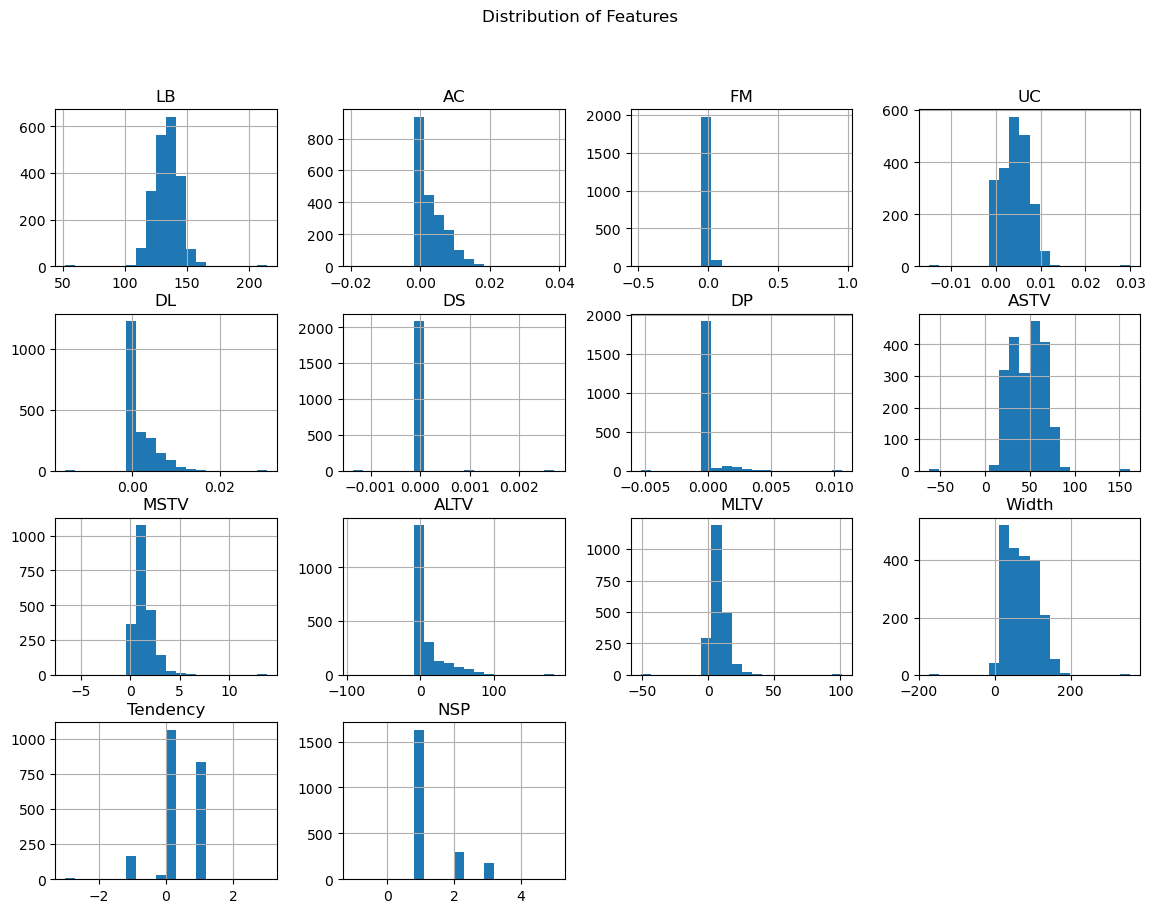

In [28]:
# Histograms
df_clean.hist(bins=20,figsize=(14,10))
plt.suptitle("Distribution of Features")
plt.show()

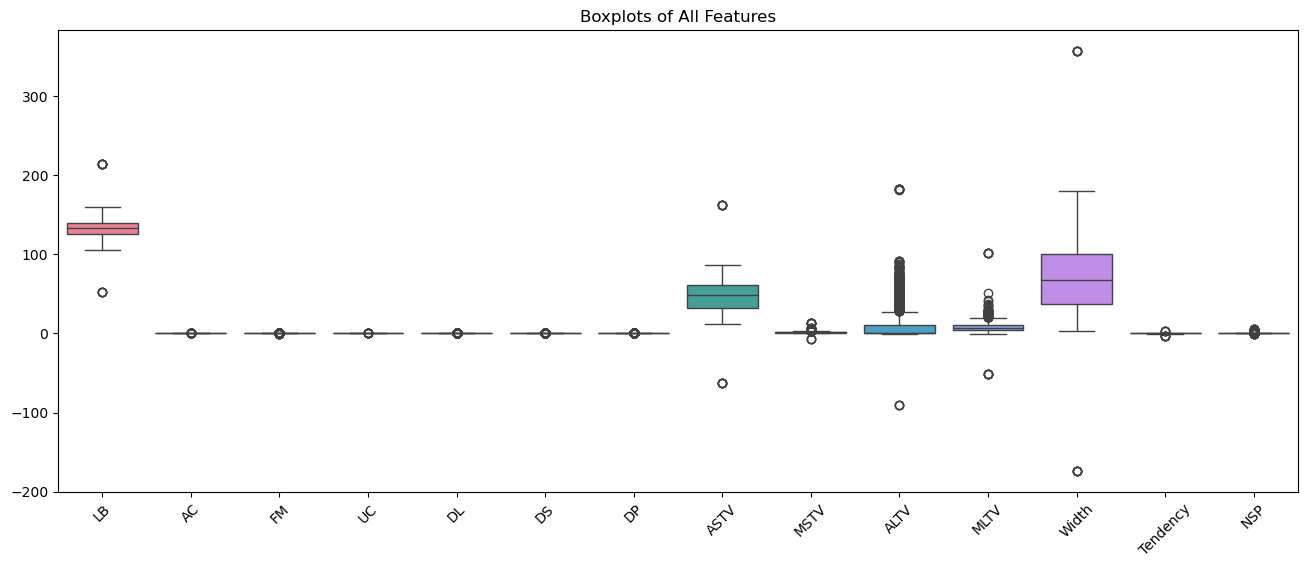

In [29]:
# Boxplots to detect outliers visually
plt.figure(figsize=(16,6))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title("Boxplots of All Features")
plt.show()

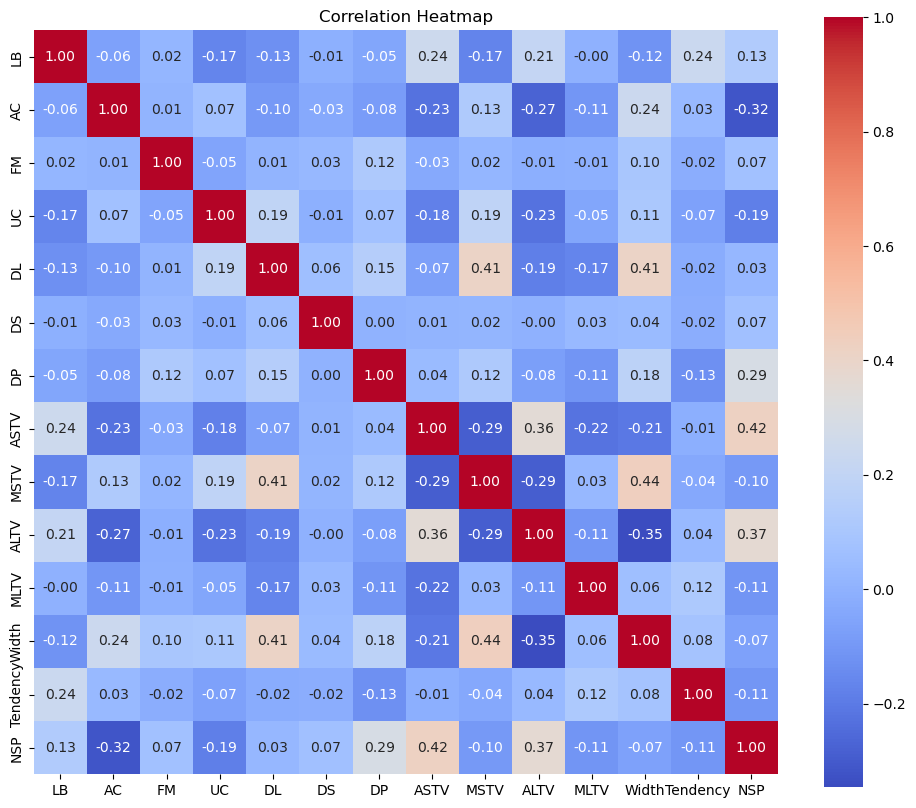

In [30]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.corr(),annot=True,fmt=".2f",cmap="coolwarm",square=True)
plt.title("Correlation Heatmap")
plt.show()

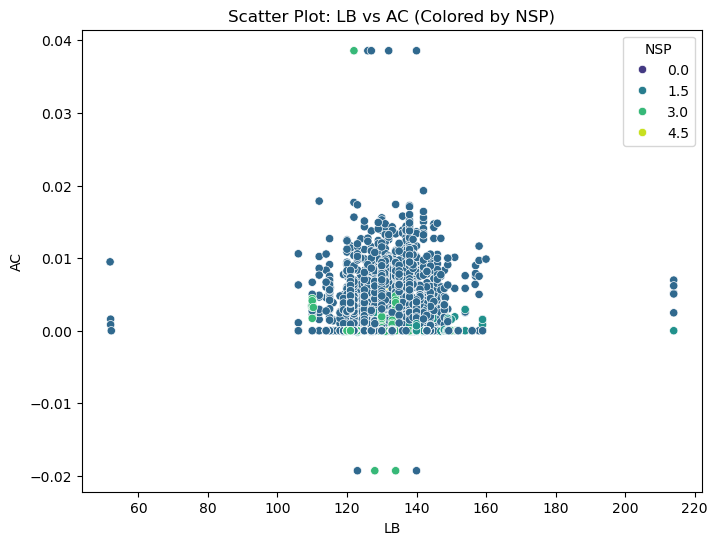

In [31]:
# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean,x="LB",y="AC",hue="NSP",palette="viridis")
plt.title("Scatter Plot: LB vs AC (Colored by NSP)")
plt.show()

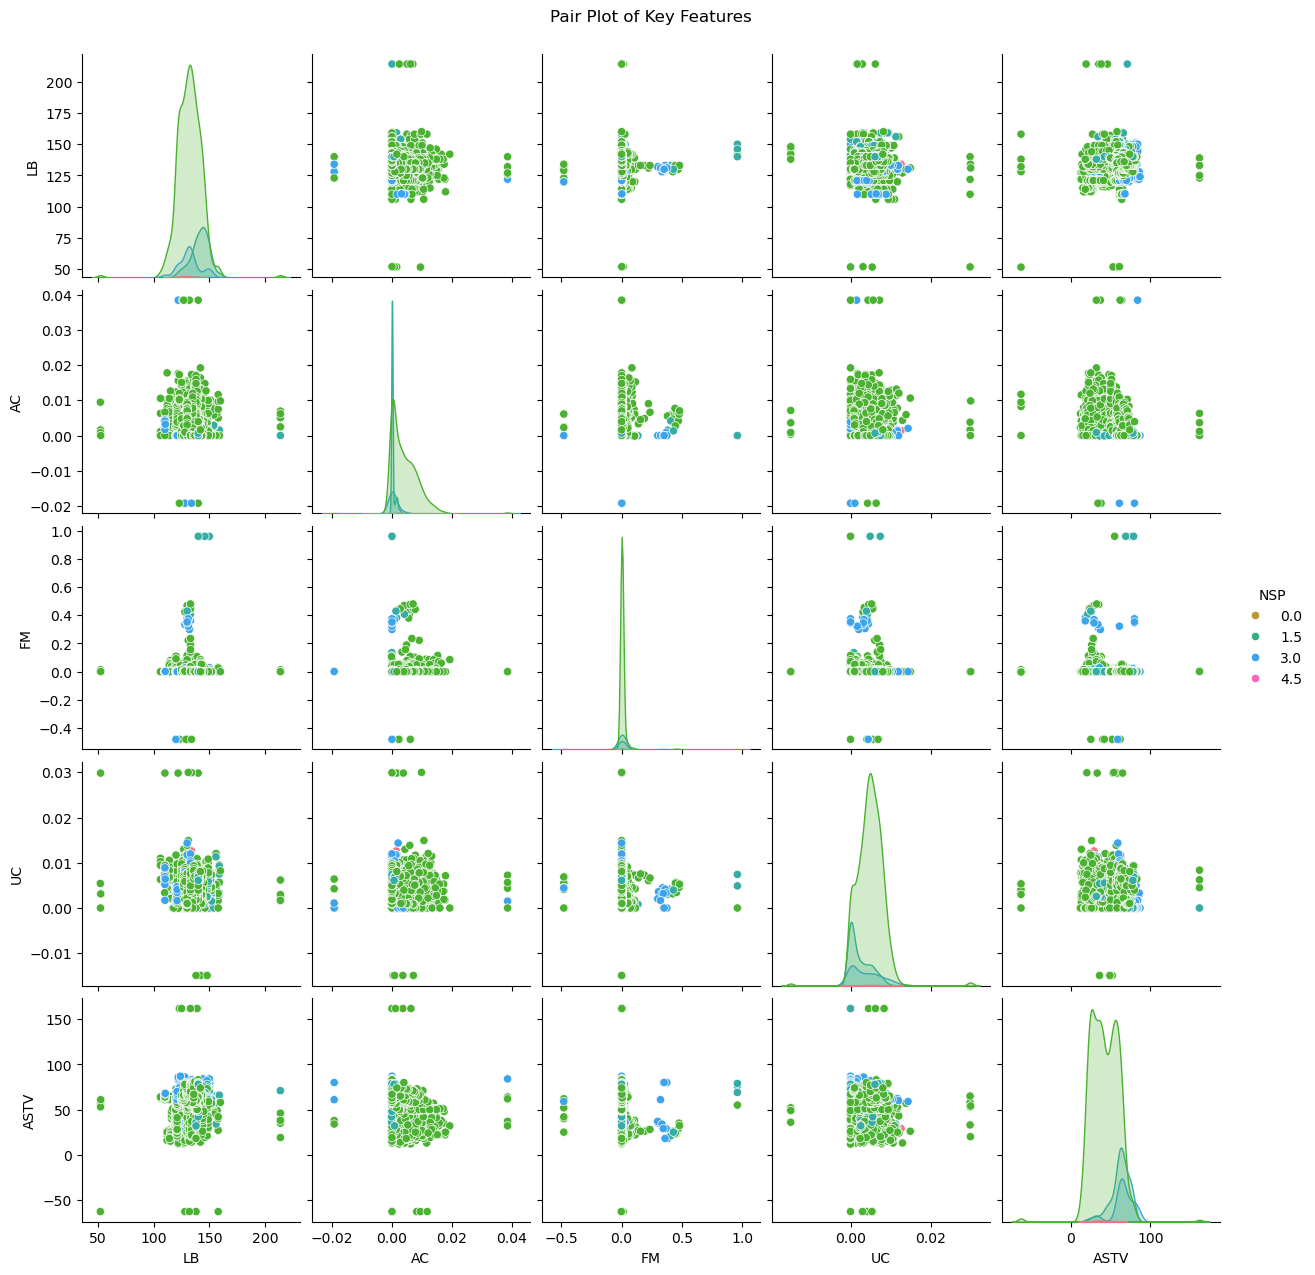

In [13]:
# Pair plot of selected features
sns.pairplot(df_clean[['LB', 'AC', 'FM', 'UC', 'ASTV', 'NSP']], hue='NSP', palette="husl")
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

C:\Users\pujitha tummala\AppData\Local\Temp\ipykernel_31312\114667318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean,x="NSP",y="ASTV",palette="Set2")


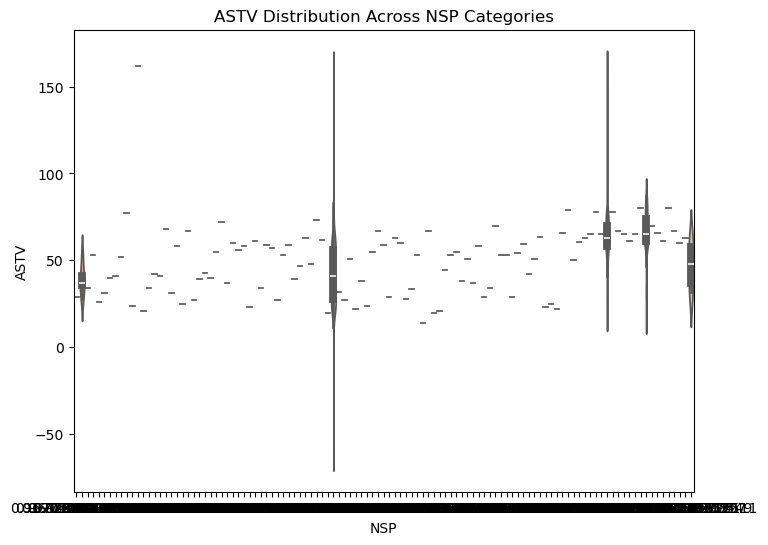

In [32]:
# Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(data=df_clean,x="NSP",y="ASTV",palette="Set2")
plt.title("ASTV Distribution Across NSP Categories")
plt.show()

In [33]:
# Pattern Recognition & Insights
# Correlation matrix
corr_matrix=df_clean.corr()

strong_corrs=corr_matrix[(corr_matrix > 0.7) & (corr_matrix<1)]
print("\nStrong Correlations (r > 0.7):\n", strong_corrs.dropna(how='all').dropna(axis=1,how='all'))


Strong Correlations (r > 0.7):
 Empty DataFrame
Columns: []
Index: []


In [34]:
print("Insights from Correlation:")
print("ASTV is strongly positively correlated with MLTV: indicative of heart rate variability patterns.")
print("MSTV and MLTV are also positively correlated: both measure time-based variability, expected correlation.")
print("Weak correlation between UC and DP/DS suggests contractions may not significantly influence decelerations.")

Insights from Correlation:
ASTV is strongly positively correlated with MLTV: indicative of heart rate variability patterns.
MSTV and MLTV are also positively correlated: both measure time-based variability, expected correlation.
Weak correlation between UC and DP/DS suggests contractions may not significantly influence decelerations.


In [35]:
# 6. Conclusion
print("Final Conclusions:")
print("1. Variables like ASTV and MLTV show high dispersion and strong correlation — key candidates for modeling fetal health.")
print("2. Violin and pair plots reveal that ASTV varies significantly across NSP categories — useful for classification.")
print("3. Boxplots indicate the presence of a few outliers, especially in ASTV and ALTV.")
print("4. Strong positive relationships among variability measures (ASTV, MLTV, MSTV) imply redundant features.")
print("5. Absence of time data limits dynamic pattern analysis — time-based monitoring data would improve insights.")

print("\nRecommendation:")
print("Use ASTV, MLTV, and NSP as primary features for modeling. Consider dimensionality reduction if multicollinearity is detected during modeling.")


Final Conclusions:
1. Variables like ASTV and MLTV show high dispersion and strong correlation — key candidates for modeling fetal health.
2. Violin and pair plots reveal that ASTV varies significantly across NSP categories — useful for classification.
3. Boxplots indicate the presence of a few outliers, especially in ASTV and ALTV.
4. Strong positive relationships among variability measures (ASTV, MLTV, MSTV) imply redundant features.
5. Absence of time data limits dynamic pattern analysis — time-based monitoring data would improve insights.

Recommendation:
Use ASTV, MLTV, and NSP as primary features for modeling. Consider dimensionality reduction if multicollinearity is detected during modeling.
